In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
# custom files
import model_best_hyperparameters
import columns
from columns import *
from imblearn.over_sampling import RandomOverSampler

# read train data
ds = pd.read_csv("C:/Users/maxim/Chess/data/games.csv")

In [2]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  16 

columns:  ['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status', 'winner', 'increment_code', 'white_id', 'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply']


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [4]:
# feature engineering
missing = []
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

In [5]:
#integer
numeric_columns = ds.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if ds[col].isnull().any():
        median_value = ds[col].median()
        ds[col].fillna(median_value, inplace=True)
#string
categorical_columns = ds.select_dtypes(include=['object','bool']).columns
map_dicts = dict()
for column in categorical_columns:
    ds[column] = ds[column].astype('category')
    map_dicts[column] = dict(zip(ds[column], ds[column].cat.codes))
    ds[column] = ds[column].cat.codes

ds.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,9068,0,1.504210e+12,1.504210e+12,13,2,2,110,1287,1500,11,1191,4524,248,1387,5
1,14512,1,1.504130e+12,1.504130e+12,16,3,0,298,16,1322,7748,1261,1987,71,750,4
2,14904,1,1.504130e+12,1.504130e+12,61,1,2,298,3823,1496,11,1500,16383,171,650,3
3,14350,1,1.504110e+12,1.504110e+12,61,1,2,187,2017,1439,134,1454,3770,241,992,3
4,3091,1,1.504030e+12,1.504030e+12,95,1,2,247,6056,1523,134,1469,15622,192,783,5


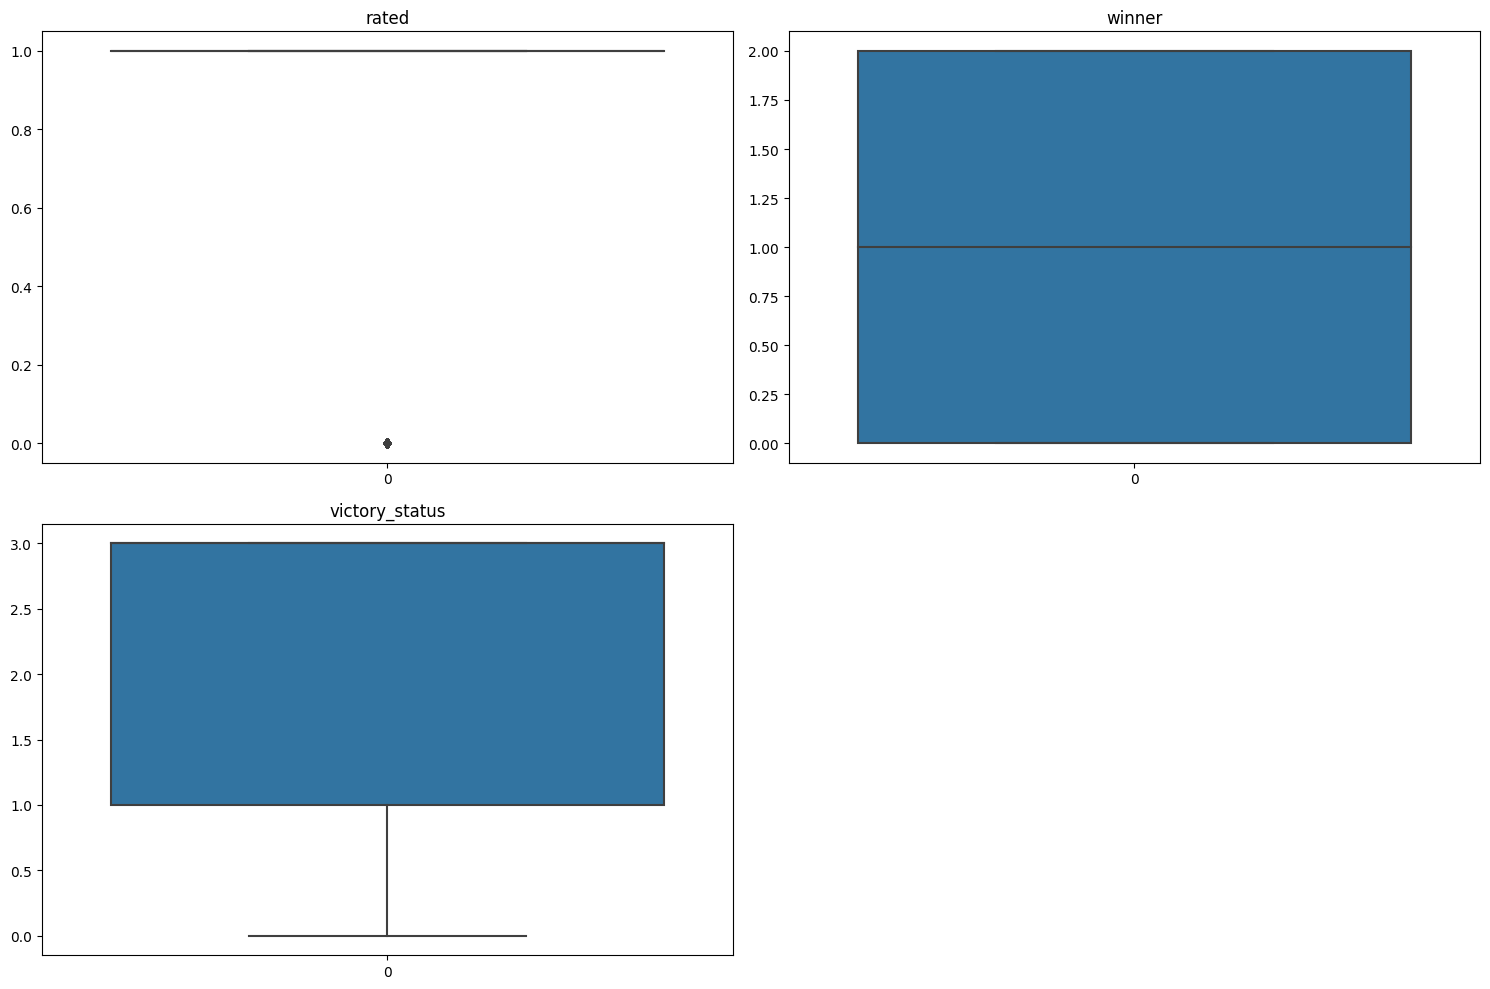

In [6]:
# Вибірка стовпців для візуалізації викидів
numeric_columns_for_plot = ['rated', 'winner', 'victory_status']

# Налаштування розміру графіка
plt.figure(figsize=(15, 10))

# Створення ящиків з вусами для кожного стовпця
for i, col in enumerate(numeric_columns_for_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(ds[ds[col].notnull()][col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [8]:
X = ds[X_columns]
y = ds[y_column]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [10]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting':GradientBoostingClassifier()
}

In [11]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred,average='micro')
    f1 = f1_score(y_test, y_pred,average='micro')
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy

In [12]:
results = {}
for model_name, model in models.items():
    precision, recall, f1, accuracy = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    }

In [13]:
# Виведення результатів
results_df = pd.DataFrame(results).T
print(results_df)

                        Precision    Recall  F1 Score  Accuracy
Logistic Regression      0.500499  0.500499  0.500499  0.500499
Random Forest            0.699900  0.699900  0.699900  0.699900
Support Vector Machine   0.500499  0.500499  0.500499  0.500499
K-Nearest Neighbors      0.473081  0.473081  0.473081  0.473081
Naive Bayes              0.500499  0.500499  0.500499  0.500499
Gradient Boosting        0.746760  0.746760  0.746760  0.746760


In [14]:
best_model_name = results_df['Accuracy'].idxmax()
best_model = models[best_model_name]
print(f"Найкраща модель: {best_model_name}")

Найкраща модель: Gradient Boosting


In [15]:
rf_classifier = GradientBoostingClassifier()
rf_classifier.fit(X_train, y_train)
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. victory_status (0.357318)
2. turns (0.245930)
3. white_rating (0.214729)
4. black_rating (0.142991)
5. white_id (0.007765)
6. moves (0.007507)
7. opening_eco (0.005170)
8. black_id (0.004070)
9. opening_name (0.002714)
10. opening_ply (0.002532)
11. id (0.002529)
12. last_move_at (0.002339)
13. created_at (0.001850)
14. increment_code (0.001617)
15. rated (0.000939)


Feature ranking:
1. victory_status (0.357318)
2. turns (0.245930)
3. white_rating (0.214729)
4. black_rating (0.142991)
5. white_id (0.007765)
6. moves (0.007507)
7. opening_eco (0.005170)
8. black_id (0.004070)
9. opening_name (0.002714)
10. opening_ply (0.002532)
11. id (0.002529)
12. last_move_at (0.002339)
13. created_at (0.001850)
14. increment_code (0.001617)
15. rated (0.000939)


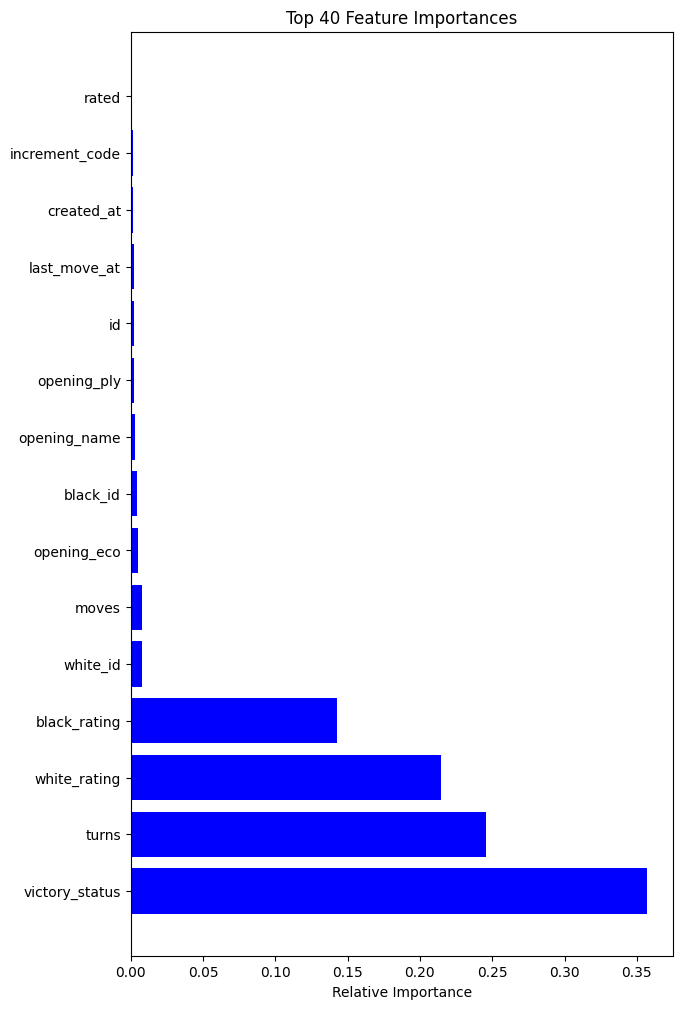

In [16]:
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))
top_40_indices = np.argsort(importances)[::-1][:40]


top_40_features = [X_columns[i] for i in top_40_indices]


top_40_importances = importances[top_40_indices]


plt.figure(figsize=(7, 12))
plt.title('Top 40 Feature Importances')
plt.barh(range(len(top_40_indices)), top_40_importances, color='b', align='center')
plt.yticks(range(len(top_40_indices)), top_40_features)
plt.xlabel('Relative Importance')
plt.show()

In [17]:
rf = GradientBoostingClassifier()

In [18]:
rf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Assume X_train, y_train are defined elsewhere

# Update the parameter grid for a GradientBoosting
param_grid = {
         'max_depth': [5,6], 
         'max_features': [0.5,0.6], 
         'min_samples_leaf': [3,4], 
         'min_samples_split': [10], 
         'n_estimators': [60]}

# Setup scorer for regression
scorer = make_scorer(precision_score, average='micro')

# Create the regressor
rf = GradientBoostingClassifier()

grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid, 
                    scoring=scorer, 
                    cv=5,
                    verbose = 3,
                    return_train_score=True)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.5f" % (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=5, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=60;, score=(train=0.783, test=0.726) total time=  18.1s
[CV 2/5] END max_depth=5, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=60;, score=(train=0.777, test=0.716) total time=  19.4s
[CV 3/5] END max_depth=5, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=60;, score=(train=0.780, test=0.728) total time=  18.7s
[CV 4/5] END max_depth=5, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=60;, score=(train=0.763, test=0.699) total time=  19.5s
[CV 5/5] END max_depth=5, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=60;, score=(train=0.773, test=0.705) total time=  19.4s
[CV 1/5] END max_depth=5, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=(train=0.783, test=0.732) total time=  18.7s
[CV 2/5] E

In [30]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),
                          pd.DataFrame(grid.cv_results_["mean_test_score"], 
                          columns=["precision"])],
                          axis=1)

grid_results

,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,precision
0,5,0.5,3,10,60,0.714768
1,5,0.5,4,10,60,0.719809
2,5,0.6,3,10,60,0.728949
3,5,0.6,4,10,60,0.730168
4,6,0.5,3,10,60,0.741802
5,6,0.5,4,10,60,0.734877
6,6,0.6,3,10,60,0.747839
7,6,0.6,4,10,60,0.756148


In [21]:
X = ds.drop(columns=['winner'])
y = ds['winner']
ros = RandomOverSampler(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
)  

X, y = ros.fit_resample(X, y)
X.shape, y.shape

((30003, 15), (30003,))

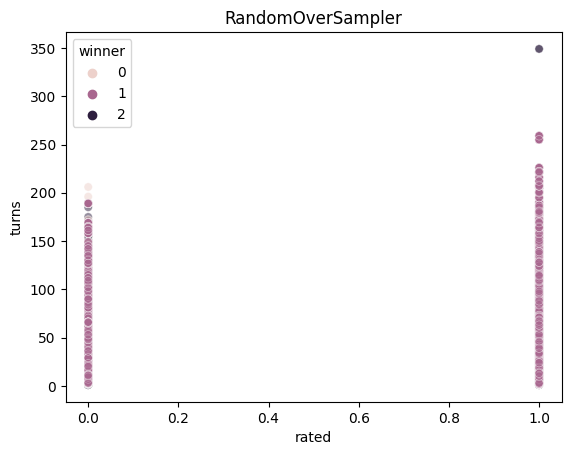

In [22]:
sns.scatterplot(
    data=X, x="rated", y="turns", hue=y, alpha=0.5
)

plt.title('RandomOverSampler')
plt.show()

In [23]:
from imblearn.under_sampling import RandomUnderSampler

X = ds.drop(columns=['winner'])
y = ds['winner']

rus = RandomUnderSampler(
    sampling_strategy='auto',  # вибираю тільки мажоритарний клас
    random_state=0,  # для відтворюваності
    replacement=True # якщо потрібно передискретизувати із заміною
)  

X, y = rus.fit_resample(X, y)
X.shape, y.shape

((2850, 15), (2850,))

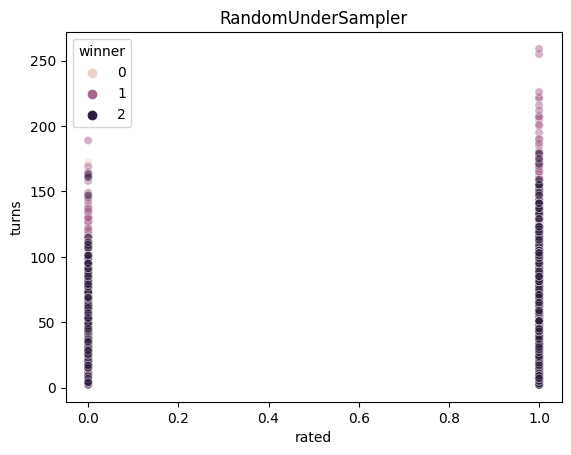

In [24]:
sns.scatterplot(
    data=X, x="rated", y="turns", hue=y, alpha=0.5
)

plt.title('RandomUnderSampler')
plt.show()